In [1]:
%cd /notebooks
!rm -d -r -rf "thesis_research"
!git clone -b master2 https://github.com/forksup/thesis_research/
!pip install progressbar fastparquet
%cd thesis_research
from run_experiments import run_experiment

/notebooks
Cloning into 'thesis_research'...
remote: Enumerating objects: 295, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 295 (delta 0), reused 1 (delta 0), pack-reused 292
Receiving objects: 100% (295/295), 10.19 MiB | 9.92 MiB/s, done.
Resolving deltas: 100% (180/180), done.
Updating files: 100% (39/39), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.1 MB/s eta 0:00:00
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12068 sha256=bc396d40887efaf0594da36a6e5017b221c9fff244043c39eca1667d5a32712e
  Stored in directory: /root/.cache/pip/wheels/d7/d9/89/a3f31c76ff6d51dc3b1575628f59afe59e4ceae3f2748cd7ad
Successfully built progressbar
/notebooks/thesis_research


In [17]:
!pip install tabulate
import tabulate
print('Tabulate Table:')
print(tabulate(rows, headers='firstrow'))

Tabulate Table:


NameError: name 'rows' is not defined

T-Test for HMC & FMC
t-value:  -0.600812562459392  p-value:  0.552632121697207
T-Test for HMC & MMC
t-value:  0.04454689304358832  p-value:  0.964773804866256
T-Test for HMC & MTD
t-value:  -11.572206465705253  p-value:  2.1770862800983142e-12
T-Test for FMC & HMC
t-value:  0.600812562459392  p-value:  0.552632121697207
T-Test for FMC & MMC
t-value:  0.623265293713676  p-value:  0.5379816048384238
T-Test for FMC & MTD
t-value:  -6.76150036933952  p-value:  2.019683515021152e-07
T-Test for MMC & HMC
t-value:  -0.04454689304358832  p-value:  0.964773804866256
T-Test for MMC & FMC
t-value:  -0.623265293713676  p-value:  0.5379816048384238
T-Test for MMC & MTD
t-value:  -8.834408360448796  p-value:  1.0150641630918451e-09
T-Test for MTD & HMC
t-value:  11.572206465705253  p-value:  2.1770862800983142e-12
T-Test for MTD & FMC
t-value:  6.76150036933952  p-value:  2.019683515021152e-07
T-Test for MTD & MMC
t-value:  8.834408360448796  p-value:  1.0150641630918451e-09
T-Test for HMC & FMC
t-v

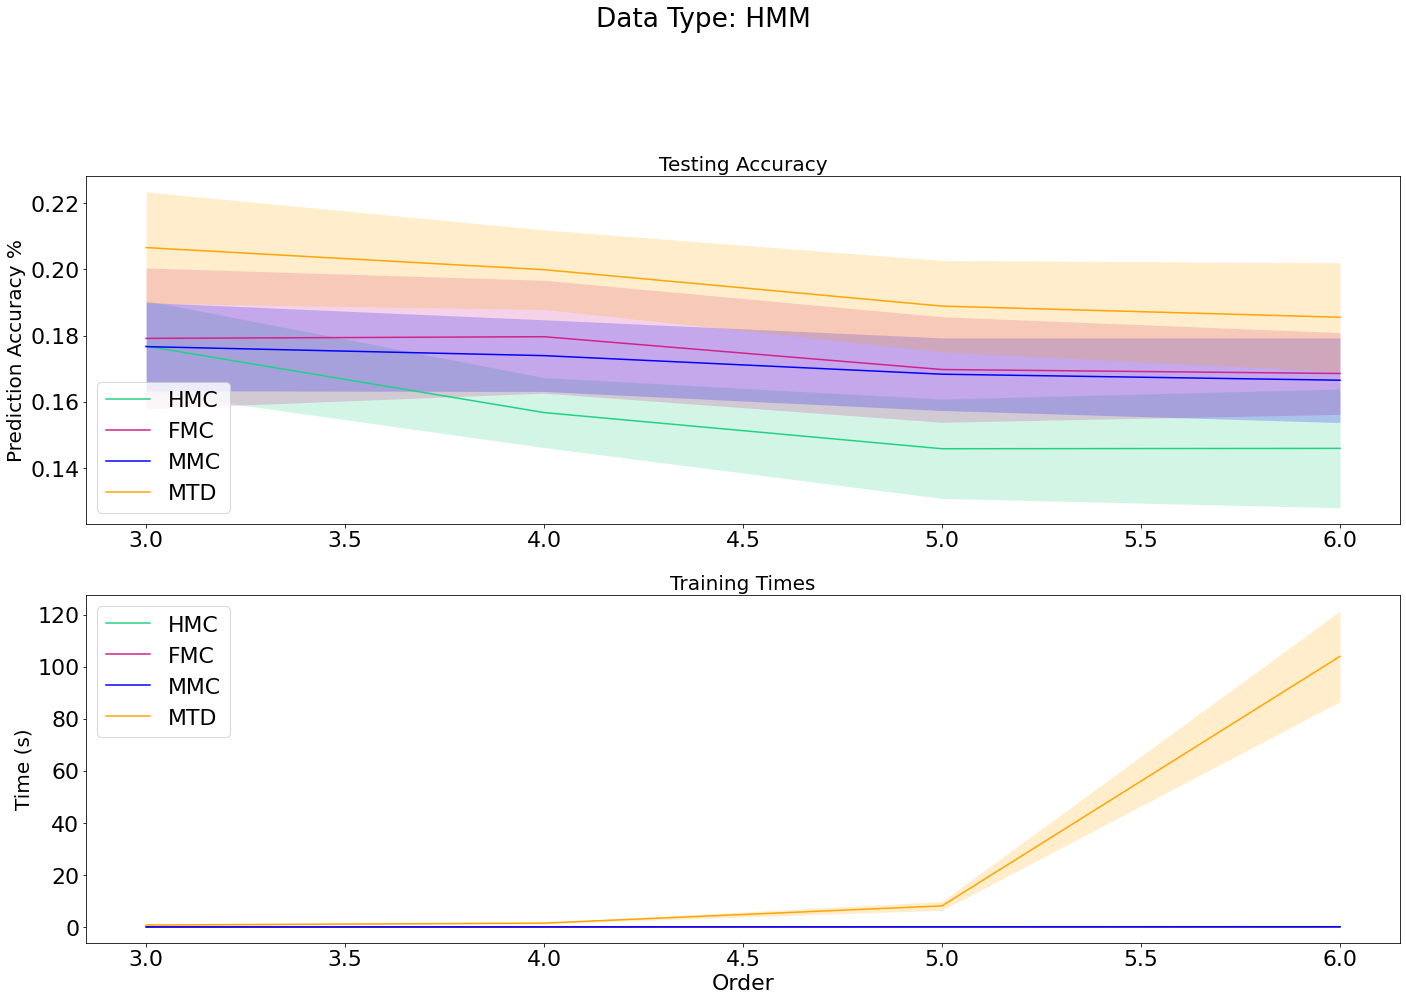

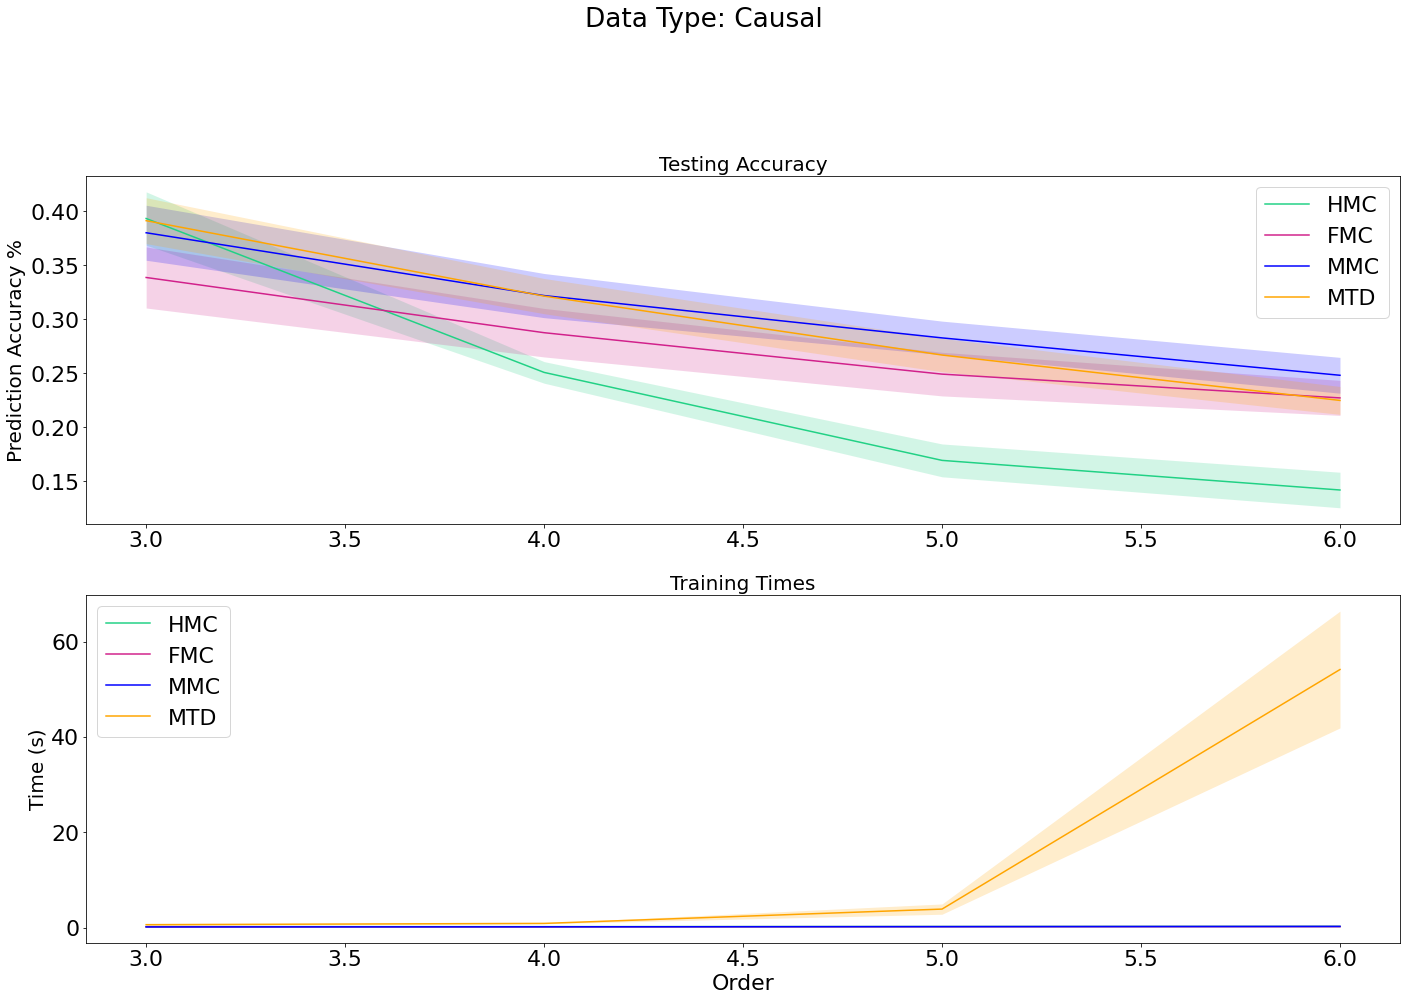

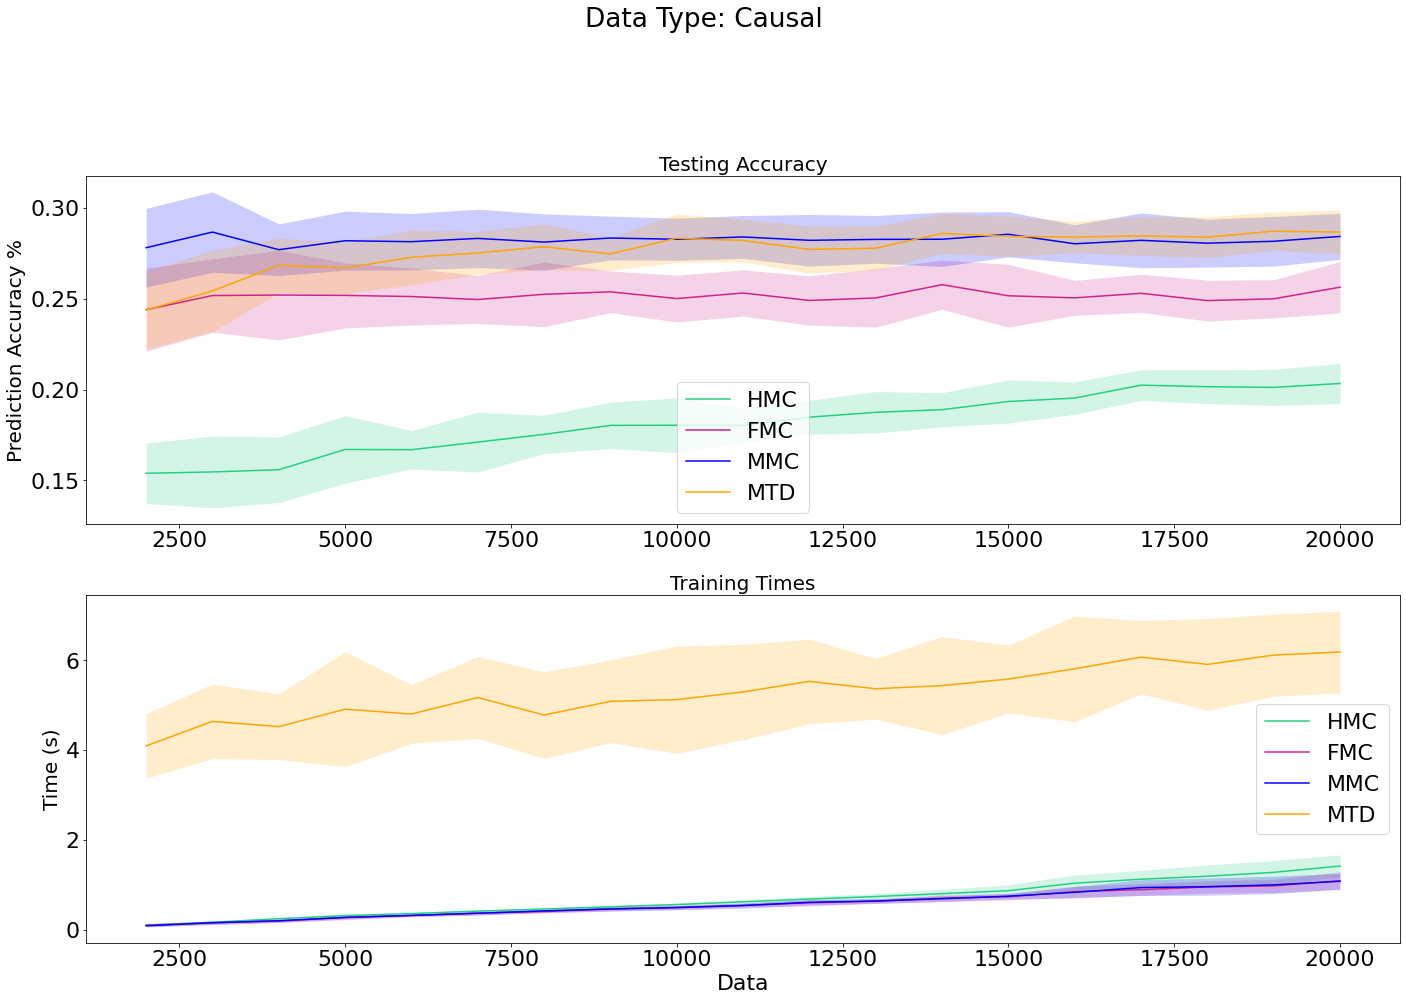

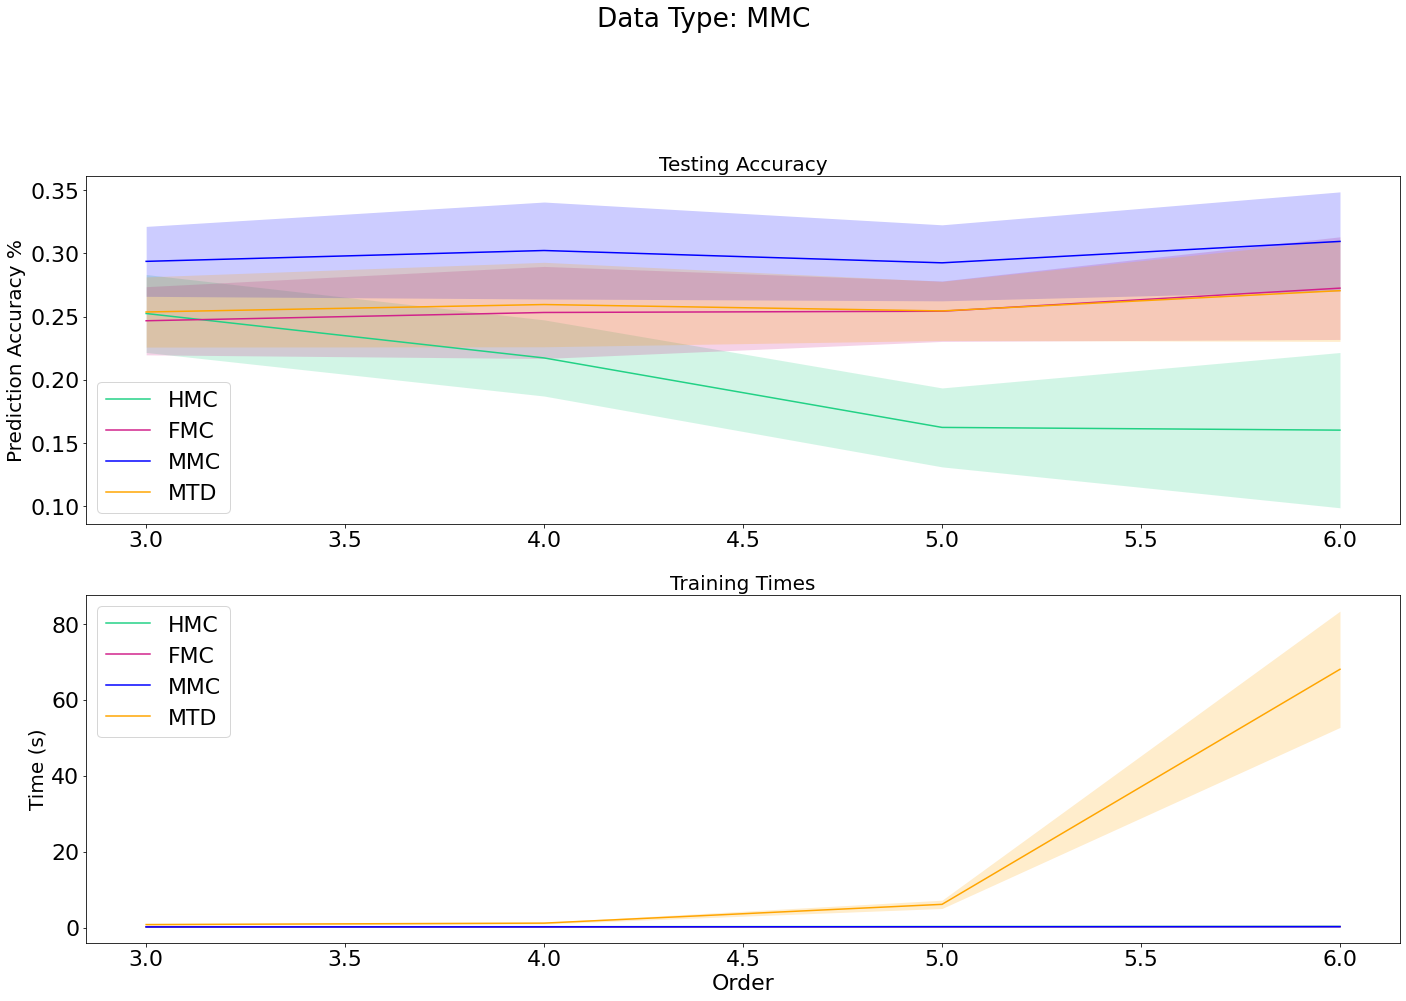

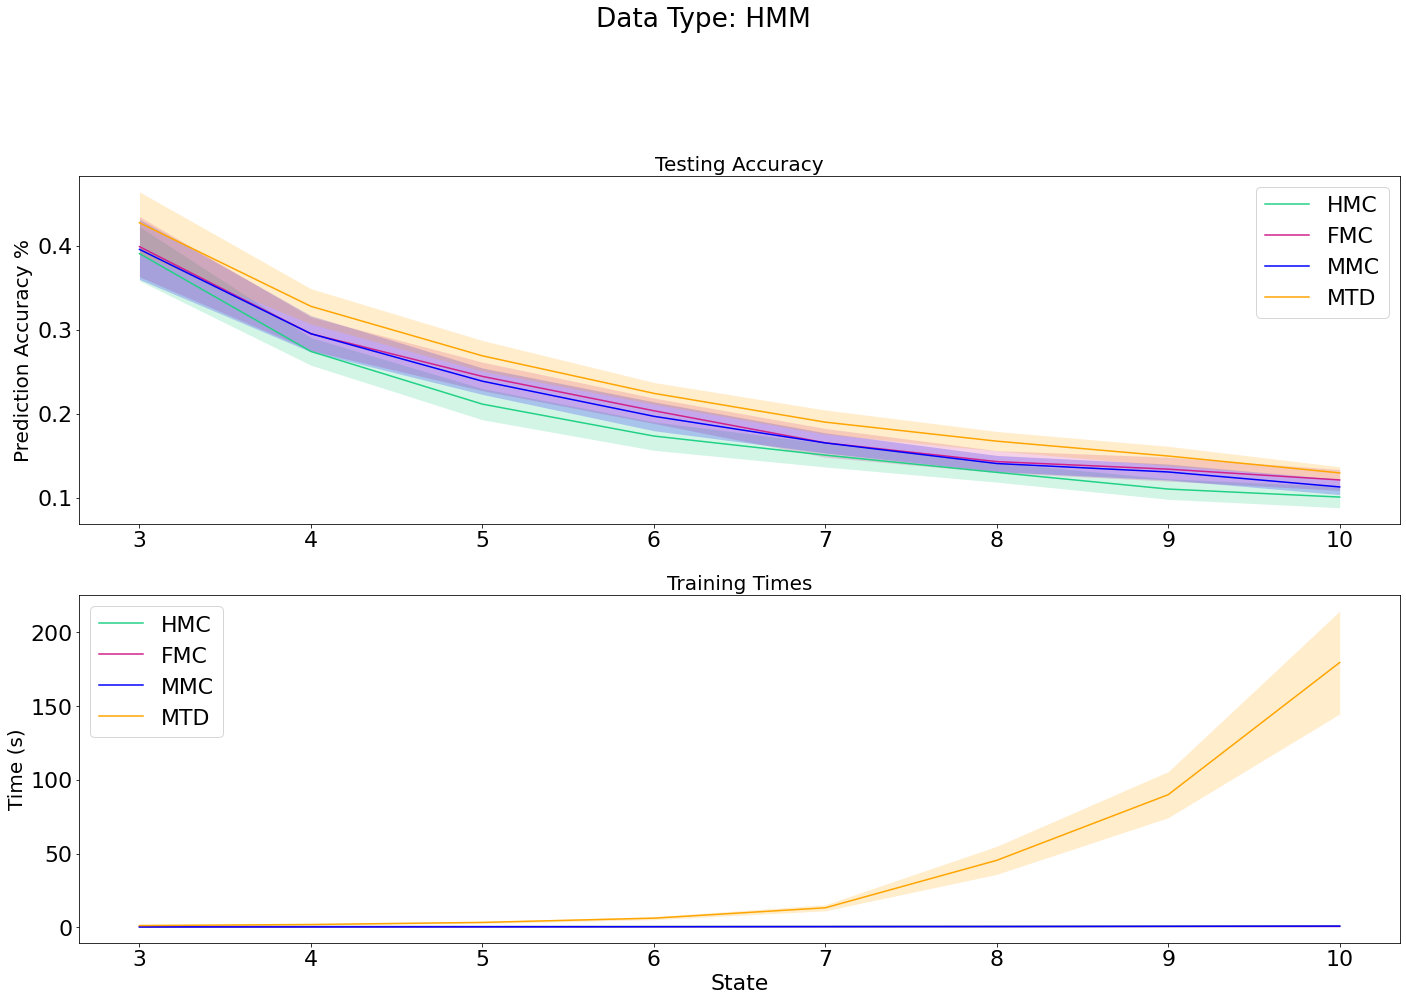

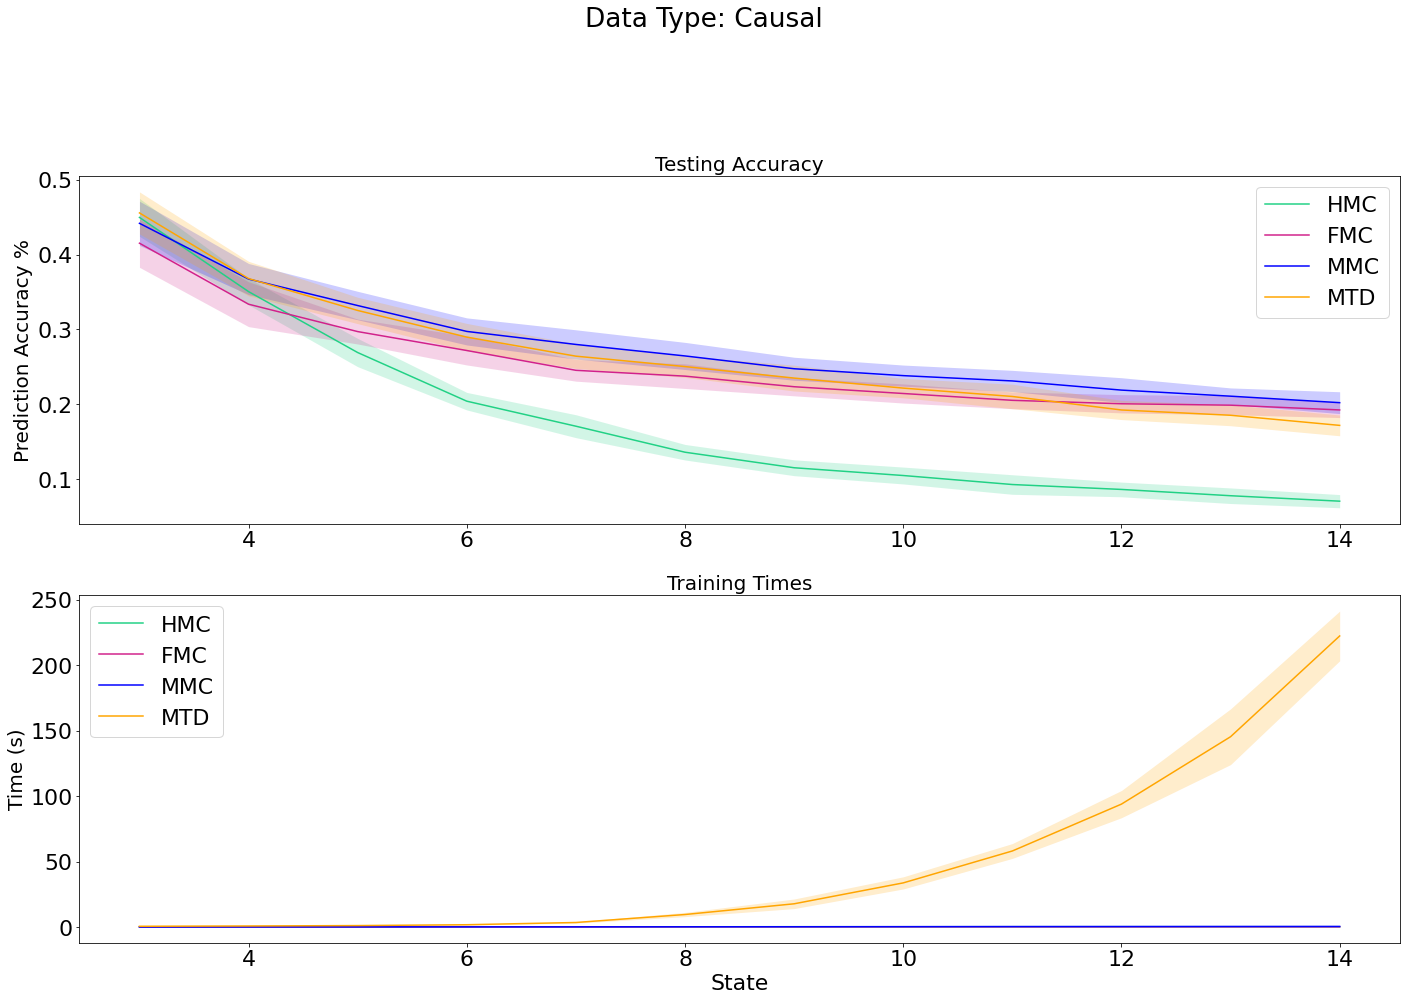

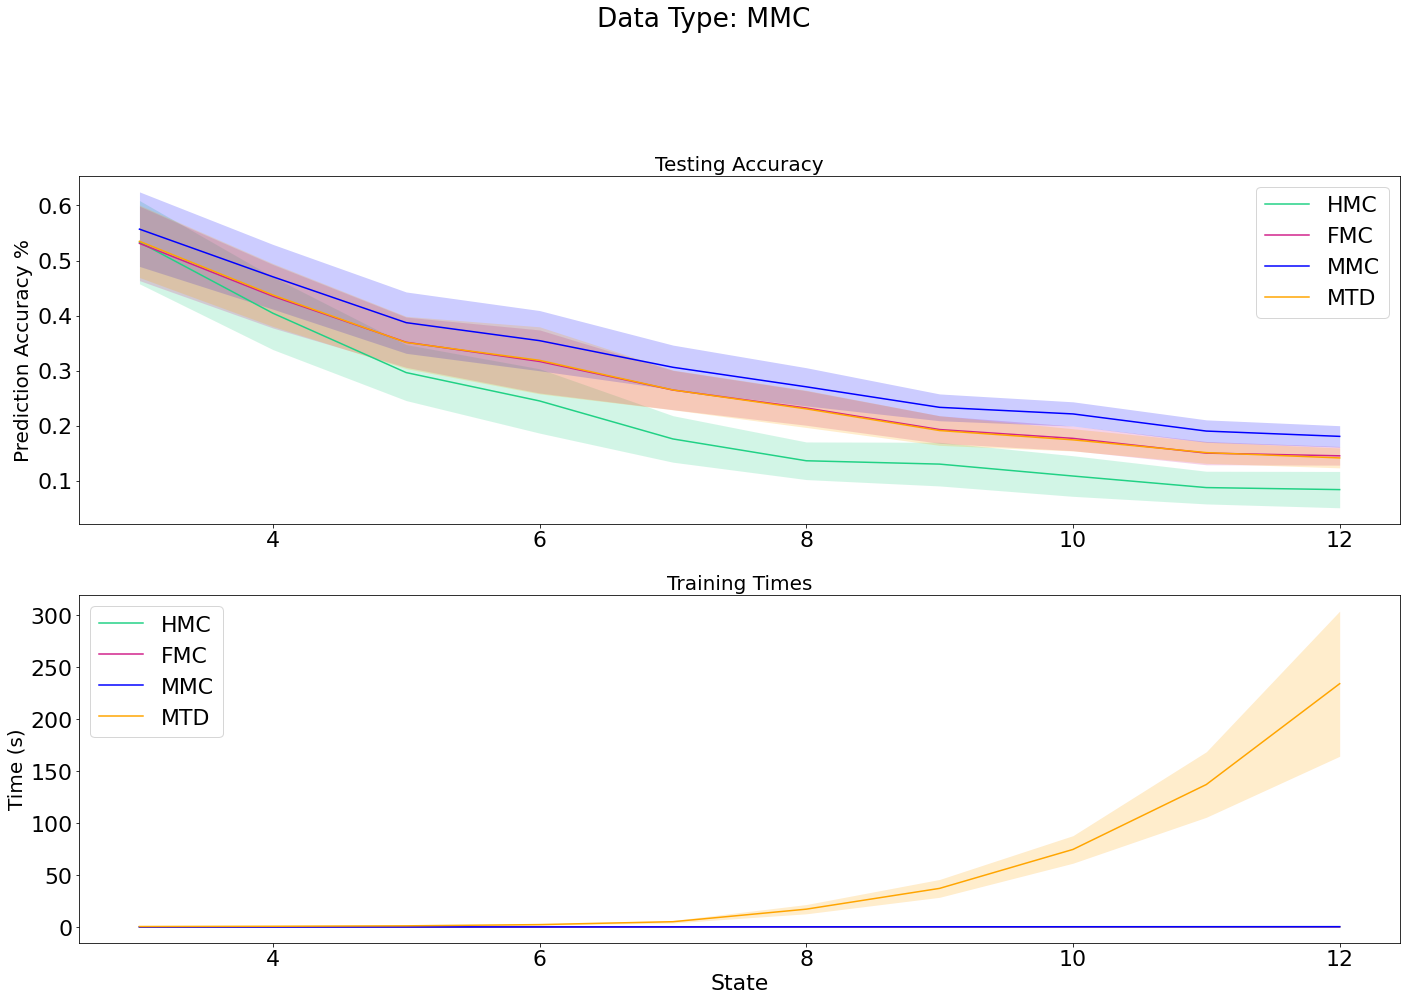

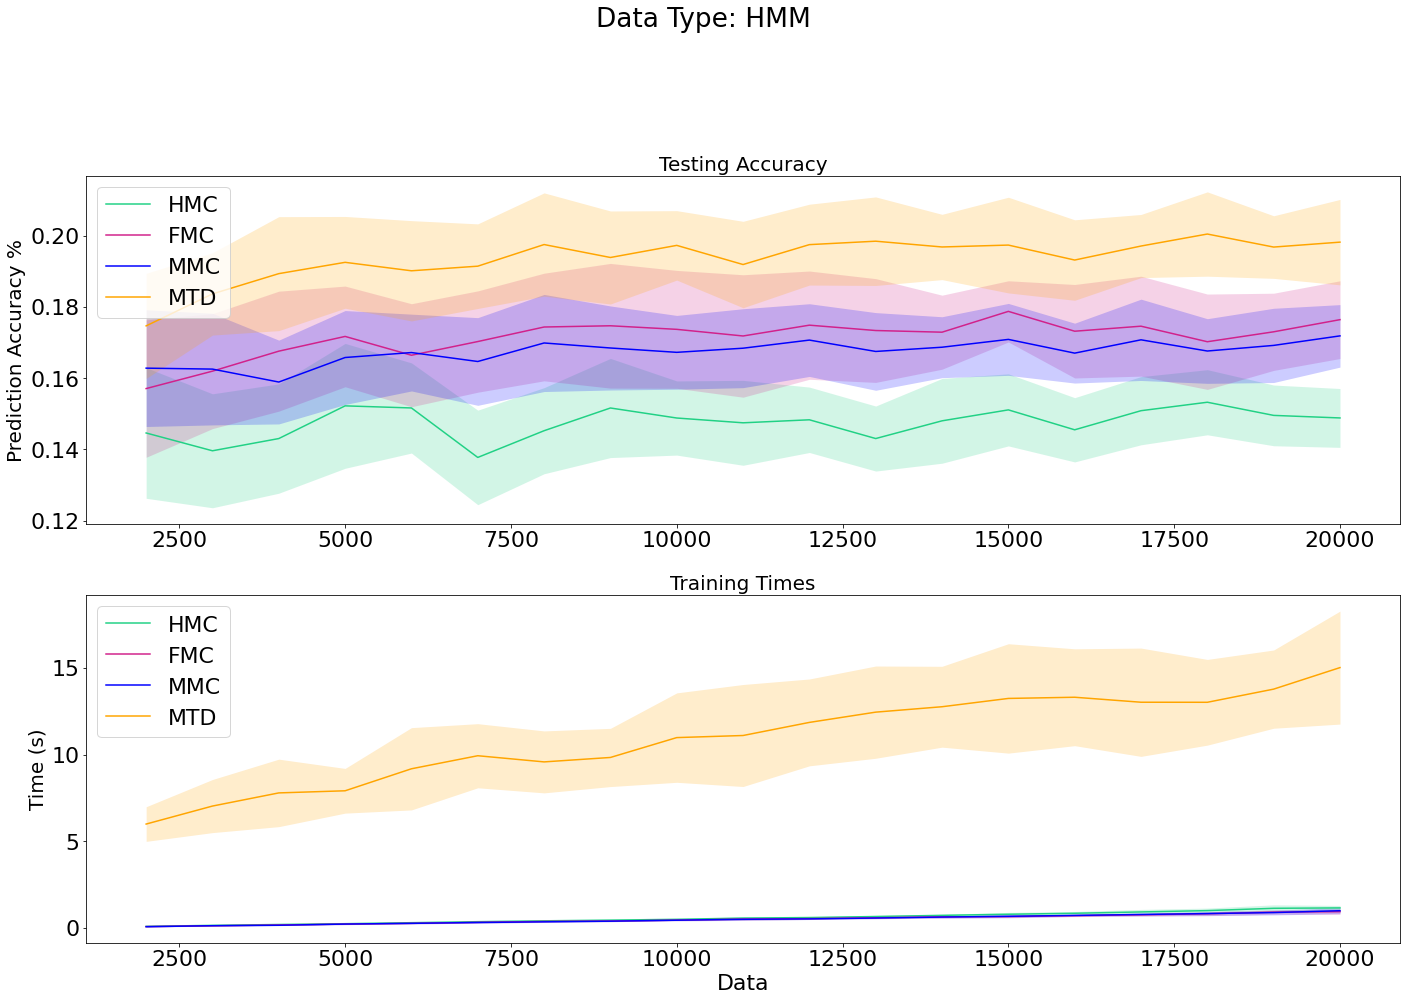

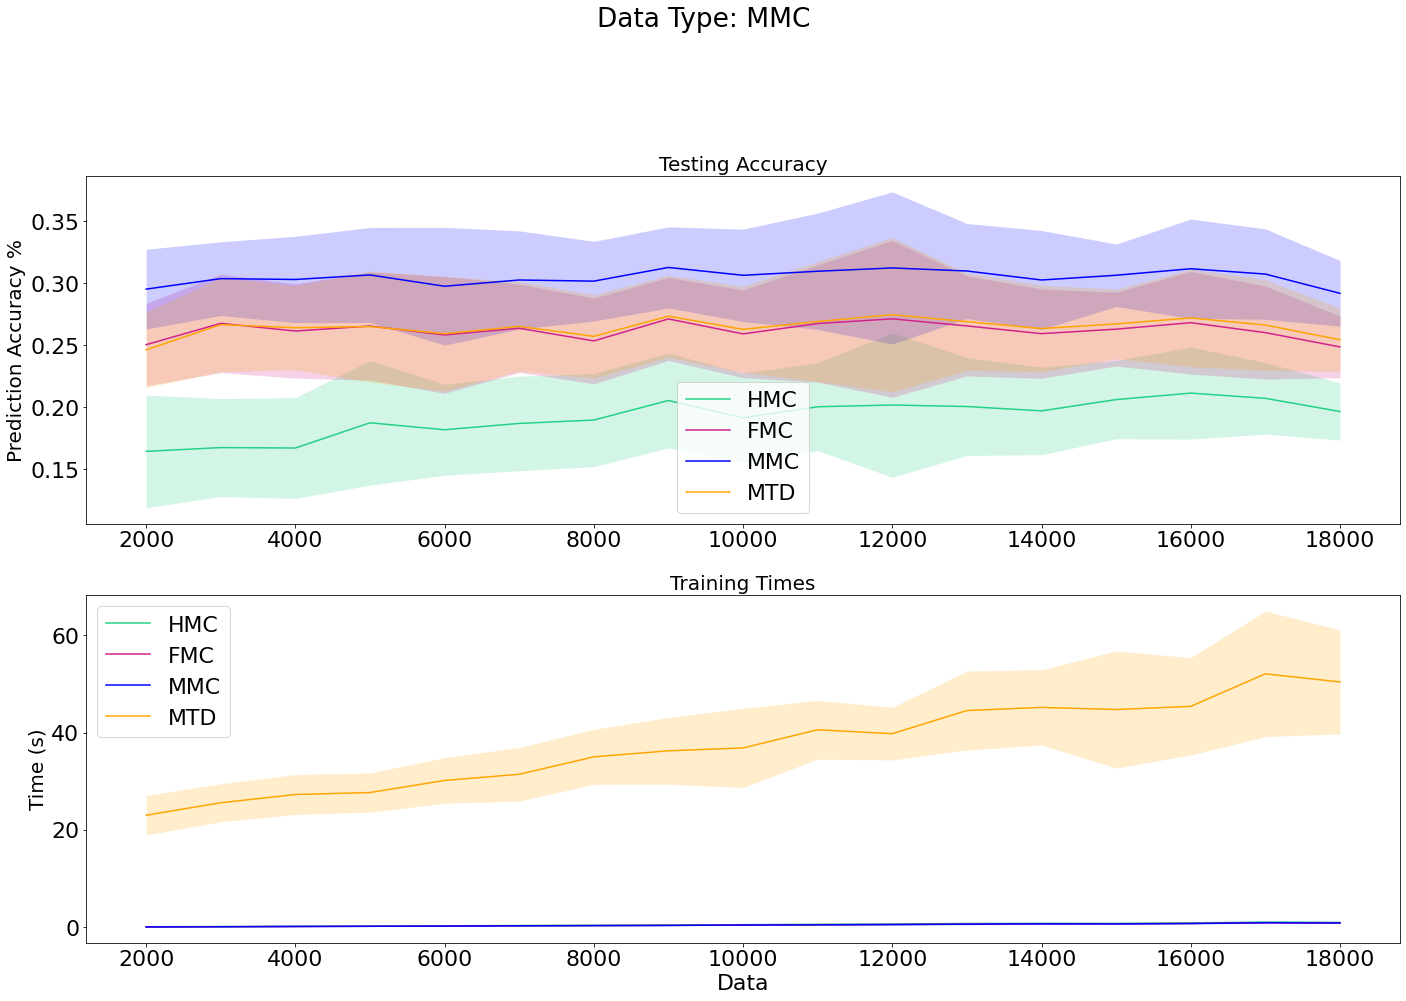

In [15]:
from run_experiments import plot_data, metrics, find_average
from matplotlib import pyplot as plt
from Models.MMC import MMC
from Models.HMC import HMC
from Models.DBN import FMC
from Models.model_sources.mtd_source import MTD
import pickle
import os
import itertools
from scipy import stats

plt.rcParams.update({'font.size': 22})
metrics = ["Testing Accuracy", "Training Times"]

from os import walk

basepath = "/storage/data/"


method_perms = list(itertools.permutations(methods, 2))
for filename in os.listdir(basepath):
    path = basepath+filename
    
    metric_to_test = path.split("/")[-1].split("_")[1].split(".")[0]
    data_type = path.split("/")[-1].split("_")[0]
    
    with open(path, 'rb') as f:
        x = pickle.load(f)
    
    t_test = []

    for st in x:
        for m1, m2 in method_perms:
            n1 = m1.__name__
            n2 = m2.__name__
            print(f"T-Test for {n1} & {n2}")
            tstat, pval = stats.ttest_rel(x[st][n1]['Testing Accuracy'][0][0], x[st][n2]['Testing Accuracy'][0][0])
            print("t-value: ", tstat, " p-value: ", pval)

    for key, data in x.items():
        for method in data:
            for m in metrics:
                x[key][method][m] = [(find_average(x[key][method][m][0][0]), x[key][method][m][0][1])]

    methods = [HMC, FMC, MMC, MTD]
    types = [m.__name__ for m in methods]

    fig, axs = plt.subplots(len(metrics), 1, figsize=(20, 13))
    fig.suptitle(f'Data Type: {data_type}', y=1.08)
    colors = ["#21d185", "#d1218b", "#0000FF", "#FFA500"]
    for im, met in enumerate(metrics):
        plot_data(x.keys(), x, met, met, axs[im], colors, "state", types)
    
    axs[-1].set_xlabel(metric_to_test)
    fig.tight_layout()
    fig.savefig("experiment_results/"+data_type+"_"+metric_to_test+".png")
    #fig.show()

In [63]:

metrics = ["Testing Accuracy", "Training Times"]
with open('/storage/data/HMM_State.pkl', 'rb') as f:
    x = pickle.load(f)
for key, data in x.items():
    for method in data:
        for m in metrics:
            x[key][method][m] = [(find_average(x[key][method][m][0][0]), x[key][method][m][0][1])]
x

defaultdict(<function run_experiments.dd()>,
            {3: defaultdict(<function run_experiments.dd2()>,
                         {'HMC': defaultdict(list,
                                      {'Testing Accuracy': [(0.39064000000000004,
                                         0.03219020140767478)],
                                       'Training Times': [(0.41604559999999996,
                                         0.06711909021562594)],
                                       ' Testing Times': [([1.36932,
                                          1.090171,
                                          0.87603,
                                          1.25291,
                                          0.862939,
                                          1.144339,
                                          1.04395,
                                          1.215424,
                                          0.99531,
                                          0.984647,
                   

In [5]:
!zip -r experiments.zip experiment_results

  adding: experiment_results/ (stored 0%)
  adding: experiment_results/Causal_Order.png (deflated 7%)
  adding: experiment_results/HMM_Data.png (deflated 5%)
  adding: experiment_results/MMC_State.png (deflated 7%)
  adding: experiment_results/MMC_Order.png (deflated 8%)
  adding: experiment_results/HMM_Order.png (deflated 8%)
  adding: experiment_results/HMM_State.png (deflated 7%)
  adding: experiment_results/Causal_State.png (deflated 7%)
  adding: experiment_results/Causal_Data.png (deflated 6%)
  adding: experiment_results/MMC_Data.png (deflated 6%)
  adding: experiment_results/.gitignore (deflated 10%)
